In [8]:
from scripts.prepro_GLAMOS_PMB import * 
from scripts.glamos_preprocess import *
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
main()

Finding closest RGIId:   0%|          | 0/2620 [00:00<?, ?it/s]

Merging stakes:   0%|          | 0/42 [00:00<?, ?it/s]

2025-04-09 14:24:12: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-04-09 14:24:12: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-04-09 14:24:12: oggm.cfg: Multiprocessing: using all available processors (N=32)
2025-04-09 14:24:12: oggm.cfg: PARAMS['border'] changed from `80` to `10`.
2025-04-09 14:24:12: oggm.cfg: Multiprocessing switched ON after user settings.
2025-04-09 14:24:12: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2025-04-09 14:24:12: oggm.workflow: init_glacier_directories from prepro level 3 on 3927 glaciers.
2025-04-09 14:24:12: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 3927 glaciers
2025-04-09 14:24:29: oggm.workflow: Execute entity tasks [gridded_attributes] on 3927 glaciers


All POINT_IDs correctly contain their respective GLACIER names.


In [10]:
df_pmb_sgi = pd.read_csv(
    os.path.join(path_PMB_GLAMOS_csv, 'CH_wgms_dataset_all.csv'))
df_pmb_sgi.head()

,YEAR,POINT_ID,GLACIER,FROM_DATE,TO_DATE,POINT_LAT,POINT_LON,POINT_ELEVATION,POINT_BALANCE,PERIOD,RGIId,aspect,slope,topo,hugonnet_dhdt,consensus_ice_thickness,millan_v,aspect_sgi,slope_sgi,topo_sgi
0,2006,adler_28,adler,20051017,20061011,46.010637,7.855896,3096.507742,-2.592,annual,RGI60-11.02764,254.483669,19.483581,3039.0,-1.504815,43.181839,3.591626,281.110176,20.345155,3015.420
1,2006,adler_54,adler,20051017,20061011,46.010052,7.858628,3141.506520,-2.502,annual,RGI60-11.02764,273.466595,12.549861,3091.0,-0.970061,41.090096,0.975349,280.805856,10.275170,3076.348
2,2006,adler_97,adler,20051017,20061011,46.010646,7.860957,3191.502735,-2.592,annual,RGI60-11.02764,256.726621,17.539690,3143.0,-1.284834,61.502941,0.503317,244.084590,19.280122,3135.240
3,2007,adler_28,adler,20061011,20071009,46.010602,7.855728,3093.507997,-2.250,annual,RGI60-11.02764,252.091791,20.371982,3026.0,-1.452664,39.826572,3.881994,262.929275,23.965118,3018.044
4,2007,adler_54,adler,20061011,20071009,46.010169,7.858461,3124.506390,-1.836,annual,RGI60-11.02764,270.308916,12.221732,3084.0,-1.188978,49.265205,1.298901,265.268856,13.386220,3076.524


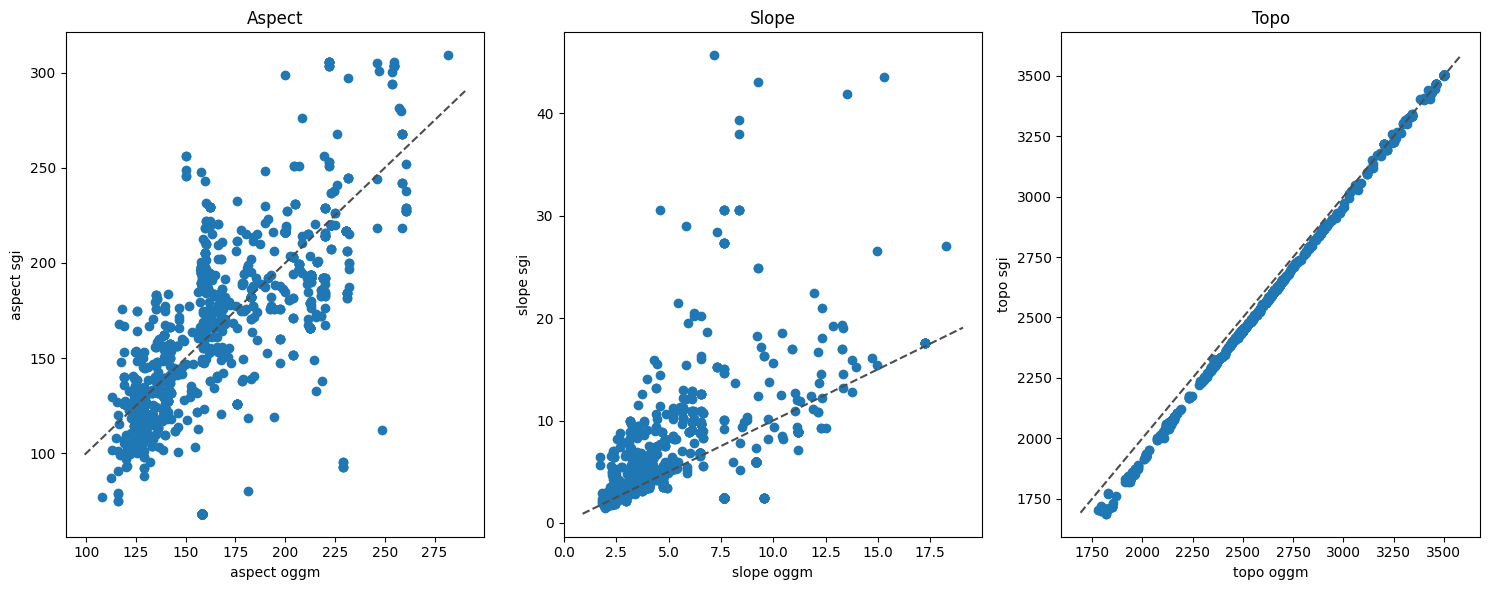

In [11]:
glacierName = 'aletsch'
df_pmb_gl = df_pmb_sgi[(df_pmb_sgi.GLACIER == glacierName)]

# Plot aspect and sgi aspect
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].scatter(df_pmb_gl.aspect, df_pmb_gl.aspect_sgi)
axs[0].set_xlabel('aspect oggm')
axs[0].set_ylabel('aspect sgi')
axs[0].set_title('Aspect')

axs[1].scatter(df_pmb_gl.slope, df_pmb_gl.slope_sgi)
axs[1].set_xlabel('slope oggm')
axs[1].set_ylabel('slope sgi')
axs[1].set_title('Slope')

# same for topo
axs[2].scatter(df_pmb_gl.topo, df_pmb_gl.topo_sgi)
axs[2].set_xlabel('topo oggm')
axs[2].set_ylabel('topo sgi')
axs[2].set_title('Topo')
# add 1:1 line
for ax in axs:
    ax.plot(ax.get_xlim(), ax.get_xlim(), ls="--", c=".3")

plt.tight_layout()